**Notebook 3: Target 2 , Emission de CO2**

---



---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 11.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
from sklearn.model_selection import GridSearchCV
import timeit
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", 100)

In [5]:
data = pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/cleaned_data.csv")
data.head()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,harvesine_distance,CatYearCode,ratioElec,ratioSteam,ratioNaturalGas,campus,nonresidential,nonresidential cos,sps-district k-12,ballard,central,delridge,downtown,east,greater duwamish,lake union,magnolia / queen anne,north,northeast,northwest,southeast,southwest,education,health,hotel,housing,mall,office,other,parking,public service,social,storage,entertainment,percentSurf
0,1,1.0,12,88434,hotel,60.0,84.300003,7226362.5,249.98,2.83,0.496782,10.0,0.546060,0.277302,0.176638,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000
1,2,1.0,11,103566,hotel,61.0,97.900002,8387933.0,295.86,2.86,0.488726,2.0,0.386609,0.000000,0.613391,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.809918,0.0,0.0,0.0,0.0,0.145453,0.0,0.0,0.0,0.044629,0.854547
2,3,1.0,41,956110,hotel,43.0,97.699997,72587024.0,2089.28,2.19,0.602378,5.0,0.682307,0.297113,0.020579,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.791220,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.794252
3,5,1.0,10,61320,hotel,56.0,113.300003,6794584.0,286.43,4.67,0.586253,10.0,0.407519,0.325913,0.266567,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000
4,8,1.0,18,175580,hotel,75.0,118.699997,14172606.0,505.01,2.88,0.650801,4.0,0.378802,0.000000,0.621198,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.703070,0.0,0.0,0.0,0.0,0.353115,0.0,0.0,0.0,0.000000,0.646885


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           997 non-null    int64  
 1   NumberofBuildings       997 non-null    float64
 2   NumberofFloors          997 non-null    int64  
 3   PropertyGFATotal        997 non-null    int64  
 4   LargestPropertyUseType  995 non-null    object 
 5   ENERGYSTARScore         997 non-null    float64
 6   SiteEUIWN(kBtu/sf)      996 non-null    float64
 7   SiteEnergyUse(kBtu)     997 non-null    float64
 8   TotalGHGEmissions       997 non-null    float64
 9   GHGEmissionsIntensity   997 non-null    float64
 10  harvesine_distance      997 non-null    float64
 11  CatYearCode             997 non-null    float64
 12  ratioElec               997 non-null    float64
 13  ratioSteam              997 non-null    float64
 14  ratioNaturalGas         997 non-null    fl

In [7]:
data.shape

(997, 45)

In [8]:
data.isna().sum()

OSEBuildingID             0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
LargestPropertyUseType    2
ENERGYSTARScore           0
SiteEUIWN(kBtu/sf)        1
SiteEnergyUse(kBtu)       0
TotalGHGEmissions         0
GHGEmissionsIntensity     0
harvesine_distance        0
CatYearCode               0
ratioElec                 0
ratioSteam                0
ratioNaturalGas           0
campus                    0
nonresidential            0
nonresidential cos        0
sps-district k-12         0
ballard                   0
central                   0
delridge                  0
downtown                  0
east                      0
greater duwamish          0
lake union                0
magnolia / queen anne     0
north                     0
northeast                 0
northwest                 0
southeast                 0
southwest                 0
education                 0
health                    0
hotel                     0
housing             

In [9]:
data.describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,harvesine_distance,CatYearCode,ratioElec,ratioSteam,ratioNaturalGas,campus,nonresidential,nonresidential cos,sps-district k-12,ballard,central,delridge,downtown,east,greater duwamish,lake union,magnolia / queen anne,north,northeast,northwest,southeast,southwest,education,health,hotel,housing,mall,office,other,parking,public service,social,storage,entertainment,percentSurf
count,997.000000,997.000000,997.000000,9.970000e+02,997.000000,996.000000,9.970000e+02,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,14794.898696,1.022066,5.141424,1.299489e+05,63.635908,70.707831,8.879682e+06,195.062177,1.406379,2.722073,5.789368,0.720207,0.023006,0.253335,0.005015,0.978937,0.008024,0.008024,0.036108,0.027081,0.027081,0.244734,0.066199,0.200602,0.102307,0.087262,0.034102,0.080241,0.055165,0.021063,0.018054,0.054381,0.061201,0.065128,0.023292,0.152566,0.351791,0.007101,0.055312,0.001377,0.064563,0.150124,0.003086,0.927334
std,13388.944438,0.514366,8.160603,2.121944e+05,28.825309,70.717493,2.582249e+07,861.727493,2.025372,2.198540,3.887185,0.267189,0.095162,0.262892,0.070675,0.143667,0.089262,0.089262,0.186653,0.162402,0.162402,0.430145,0.248754,0.400652,0.303204,0.282360,0.181583,0.271802,0.228418,0.143667,0.133214,0.261606,0.245827,0.235386,0.146359,0.352037,0.411538,0.053097,0.128282,0.032524,0.248675,0.390570,0.019177,0.142897
min,1.000000,0.000000,0.000000,1.630000e+04,1.000000,0.000000,7.971180e+04,-0.800000,-0.020000,0.021130,0.000000,-0.336762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104977
25%,554.000000,1.000000,1.000000,3.156900e+04,44.000000,36.574999,1.269848e+06,20.300000,0.330000,0.790390,3.000000,0.510906,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,20503.000000,1.000000,3.000000,5.373000e+04,71.000000,53.599998,2.826828e+06,49.740000,0.740000,2.104012,5.000000,0.758531,0.000000,0.180676,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,24244.000000,1.000000,5.000000,1.268230e+05,88.000000,78.349998,7.739699e+06,144.410000,1.700000,4.107644,9.000000,0.999999,0.000000,0.466112,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.762046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,50081.000000,9.000000,99.000000,1.952220e+06,100.000000,834.400024,4.483853e+08,16870.980000,34.090000,8.842992,13.000000,1.000003,0.701754,0.995545,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.472279,2.697535,1.282573,1.513747,3.997791,1.529857,1.000000,0.895023,0.994060,1.607691,6.426849,0.245455,1.000000


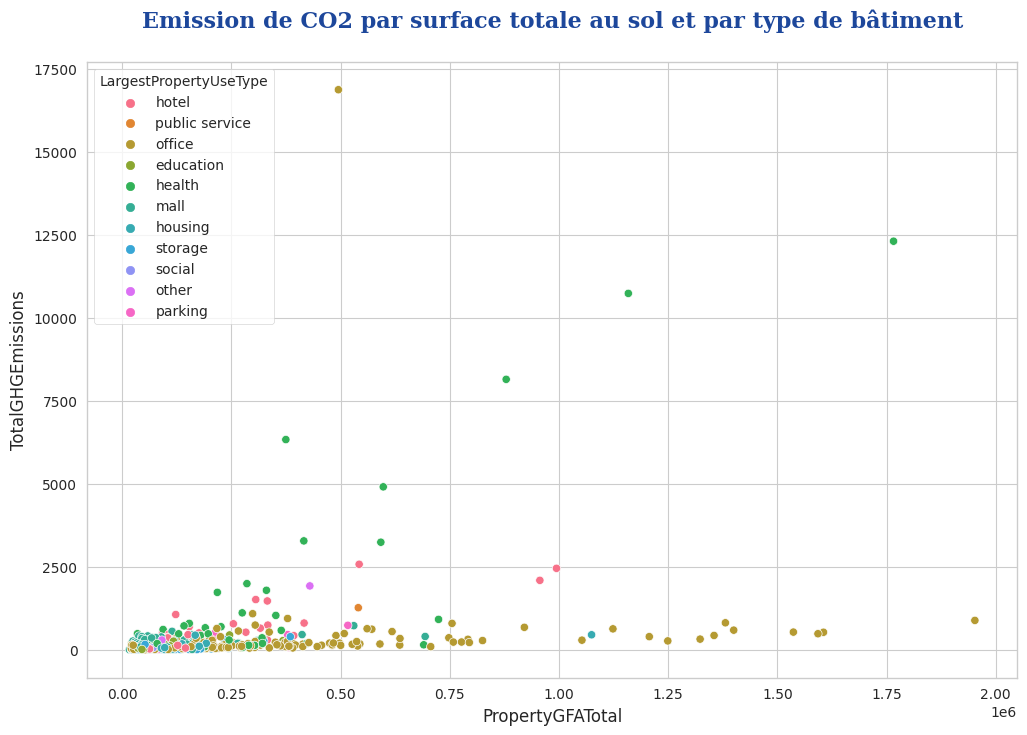

In [10]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='LargestPropertyUseType')
plt.title(f"Emission de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [11]:
data.columns

Index(['OSEBuildingID', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'LargestPropertyUseType', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'harvesine_distance', 'CatYearCode',
       'ratioElec', 'ratioSteam', 'ratioNaturalGas', 'campus',
       'nonresidential', 'nonresidential cos', 'sps-district k-12', 'ballard',
       'central', 'delridge', 'downtown', 'east', 'greater duwamish',
       'lake union', 'magnolia / queen anne', 'north', 'northeast',
       'northwest', 'southeast', 'southwest', 'education', 'health', 'hotel',
       'housing', 'mall', 'office', 'other', 'parking', 'public service',
       'social', 'storage', 'entertainment', 'percentSurf'],
      dtype='object')

In [12]:
colonne_X = ['NumberofBuildings', 'NumberofFloors','ENERGYSTARScore',
       'PropertyGFATotal', 'harvesine_distance', 'CatYearCode',
       'ratioElec', 'ratioSteam', 'ratioNaturalGas', 'percentSurf']
data_X = data[colonne_X]

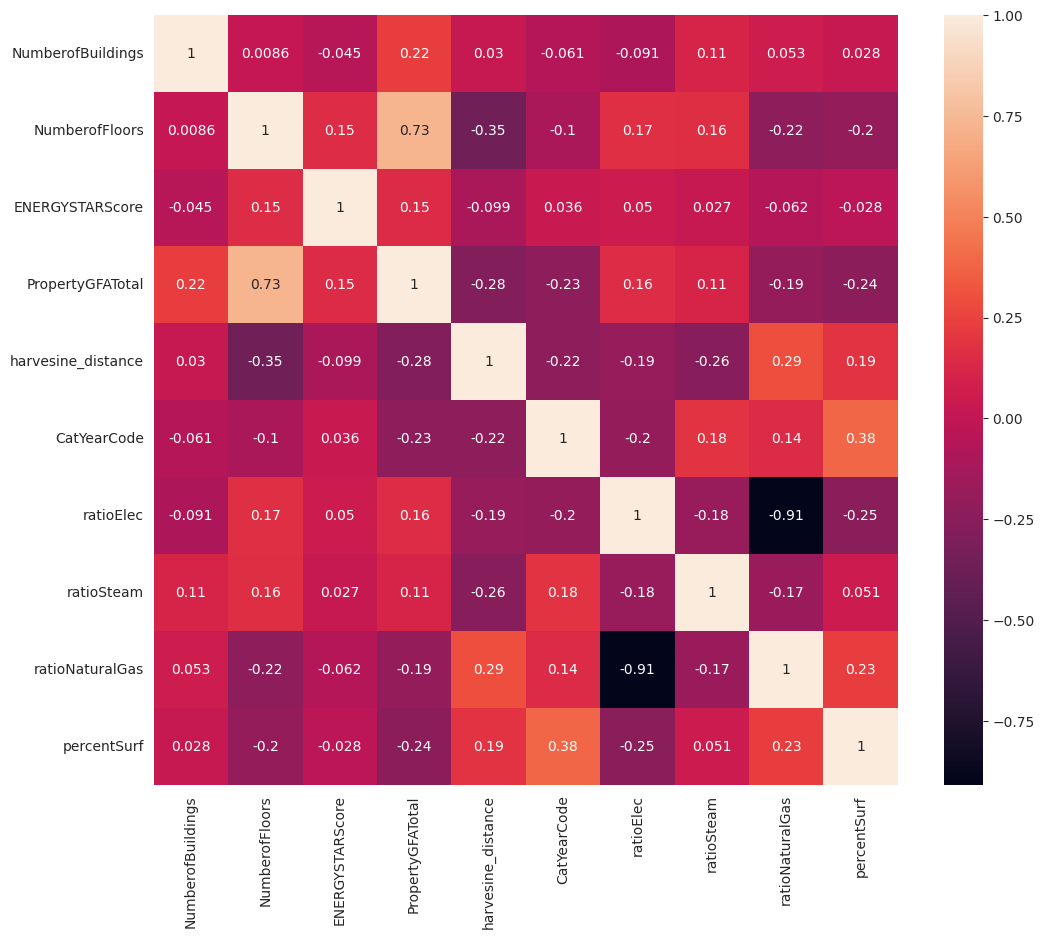

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(data_X.corr(), annot=True)
plt.show()

In [17]:
data_X.head()

,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFATotal,harvesine_distance,CatYearCode,ratioElec,ratioSteam,ratioNaturalGas,percentSurf
0,1.0,12,60.0,88434,0.496782,10.0,0.546060,0.277302,0.176638,1.000000
1,1.0,11,61.0,103566,0.488726,2.0,0.386609,0.000000,0.613391,0.854547
2,1.0,41,43.0,956110,0.602378,5.0,0.682307,0.297113,0.020579,0.794252
3,1.0,10,56.0,61320,0.586253,10.0,0.407519,0.325913,0.266567,1.000000
4,1.0,18,75.0,175580,0.650801,4.0,0.378802,0.000000,0.621198,0.646885


In [18]:
data_y = data['TotalGHGEmissions']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.15)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (847, 10)
y_train (847,)
X_test (150, 10)
y_test (150,)


In [20]:
def evaluation( model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    rsq_test = model.score(X_test, y_test)

    #prédire sur le jeu de test
    y_test_pred = model.predict(X_test)

    # calculer la RMSLE sur le jeu de test
    #RMSLE (Root Mean Squared Log Error)
    rmsle = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
        
    return [rsq_test,rmsle]

## **Linear Regression**

In [21]:
print("Emission de CO2 R², RMSLE", evaluation(LinearRegression(), X_train, X_test, y_train, y_test))
        

Emission de CO2 R², RMSLE [0.48185955206709674, 630.3243114050755]


## **DummyRegressor**

In [22]:
print("Emission de CO2 R², RMSLE", evaluation(DummyRegressor(), X_train, X_test, y_train, y_test))

Emission de CO2 R², RMSLE [-0.0038760369035073516, 877.365097419506]


## **Ridge**

In [23]:
print("Emission de CO2 R², RMSLE", evaluation(Ridge(alpha=0.5), X_train, X_test, y_train, y_test))

Emission de CO2 R², RMSLE [0.4800658045062721, 631.4144268837417]


In [24]:
#grid.cv_results
params_grid = { 'alpha':np.logspace(-2,4,30)}
print( params_grid)
grid = GridSearchCV(Ridge(),params_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))

{'alpha': array([1.00000000e-02, 1.61026203e-02, 2.59294380e-02, 4.17531894e-02,
       6.72335754e-02, 1.08263673e-01, 1.74332882e-01, 2.80721620e-01,
       4.52035366e-01, 7.27895384e-01, 1.17210230e+00, 1.88739182e+00,
       3.03919538e+00, 4.89390092e+00, 7.88046282e+00, 1.26896100e+01,
       2.04335972e+01, 3.29034456e+01, 5.29831691e+01, 8.53167852e+01,
       1.37382380e+02, 2.21221629e+02, 3.56224789e+02, 5.73615251e+02,
       9.23670857e+02, 1.48735211e+03, 2.39502662e+03, 3.85662042e+03,
       6.21016942e+03, 1.00000000e+04])}
-0.36963623085359043 {'alpha': 0.17433288221999882}
Emission de CO2 R², RMSLE [0.481168827985037, 630.7443087053401]


In [25]:
#grid.cv_results
params_grid = { 'alpha':[0.17433288221999882]}
print( params_grid)
grid = GridSearchCV(Ridge(),params_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))

{'alpha': [0.17433288221999882]}
-0.36963623085359043 {'alpha': 0.17433288221999882}
Emission de CO2 R², RMSLE [0.481168827985037, 630.7443087053401]


## **Lasso**

In [26]:
print("Emission de CO2 R², RMSLE", evaluation(Lasso(alpha=0.1), X_train, X_test, y_train, y_test))

Emission de CO2 R², RMSLE [0.4816526867114246, 630.4501259900466]


In [27]:
#grid.cv_results
print( params_grid)
grid = GridSearchCV(Lasso(),params_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))

{'alpha': [0.17433288221999882]}
-0.3696490297860207 {'alpha': 0.17433288221999882}
Consommation Energie R² RMSLE [0.4814940121148763, 630.5466141576286]


In [28]:
params_grid = { 'alpha':[0.17433288221999882]}
print( params_grid)
grid = GridSearchCV(Lasso(),params_grid, cv=5)
grid.fit(X_train, y_train)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))

{'alpha': [0.17433288221999882]}
-0.3696490297860207 {'alpha': 0.17433288221999882}
Emission de CO2 R², RMSLE [0.4814940121148763, 630.5466141576286]


## **RandomForestRegressor**

In [30]:
print("Emission de CO2 R², RMSLE", evaluation(RandomForestRegressor(), X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

Emission de CO2 R², RMSLE [0.6176256058936345, 541.4828559480185]


In [31]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num =100)]

max_features = ['auto', 'sqrt']#Nombre des features par split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Max profondeur
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples to split a node
bootstrap = [True, False] #sample selection

#the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
               }
print(random_grid)

rf = RandomForestRegressor()
# CrossValidation avec k=3, 100 itterations,
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit
rf_random.fit(X_train, y_train.values.ravel())

print(rf_random.best_params_)

{'n_estimators': [100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 302, 306, 310, 314, 318, 322, 326, 330, 334, 338, 342, 346, 350, 354, 358, 362, 366, 370, 374, 378, 382, 386, 390, 394, 398, 403, 407, 411, 415, 419, 423, 427, 431, 435, 439, 443, 447, 451, 455, 459, 463, 467, 471, 475, 479, 483, 487, 491, 495, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 136, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 40}


In [32]:
start_time = timeit.default_timer()

# Application des resultat du random search
params_grid = {
    'max_depth': [40],
    'max_features': ['auto'],
    'min_samples_split': [10],
    'n_estimators': [136]
}             
print( params_grid)
grid = GridSearchCV(RandomForestRegressor(),params_grid, cv=5)
grid.fit(X_train, y_train.values.ravel())

#grid.cv_results

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))

{'max_depth': [40], 'max_features': ['auto'], 'min_samples_split': [10], 'n_estimators': [136]}
resultat en 4.62s
0.2440827994667507 {'max_depth': 40, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 136}
Emission de CO2 R², RMSLE [0.6455885965231586, 521.307716570027]


## **GradientBoostingRegressor**

In [29]:
print("Emission de CO2 R², RMSLE", evaluation(GradientBoostingRegressor(), X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))

Emission de CO2 R², RMSLE [0.6467597124390652, 520.445700088264]


In [33]:
#random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'learning_rate': [0.01,0.05,0.1,0.3,1],
               'criterion' : ['friedman_mse', 'mse', 'mae'],
               'max_depth' : [2, 3, 5, 10, 15],
               'min_samples_leaf' : [1, 2, 4, 6, 8] ,
               'min_samples_split' : [2, 4, 6, 10],
               'max_features' : ['auto', 'sqrt', 'log2', None],
               'loss': ['ls','lad','huber', 'quantile']}
print(random_grid)

# CrossValidation avec k=3, 100 itterations,
gbr_random = RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit 
gbr_random.fit(X_train, y_train.values.ravel())

print(gbr_random.best_params_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'criterion': ['friedman_mse', 'mse', 'mae'], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None], 'loss': ['ls', 'lad', 'huber', 'quantile']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 3, 'loss': 'quantile', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}


In [34]:
start_time = timeit.default_timer()

# Application des resultat du random search
params_grid = {
                'n_estimators': [2000],
               'learning_rate': [0.01],
               'criterion' : ['friedman_mse'],
               'max_depth' : [3],
               'min_samples_leaf' : [1] ,
               'min_samples_split' : [2],
               'max_features' : ['auto'],
               'loss': ['quantile']
}             
print( params_grid)
grid = GridSearchCV(GradientBoostingRegressor(),params_grid, cv=5)
grid.fit(X_train, y_train.values.ravel())

#grid.cv_results

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))

{'n_estimators': [2000], 'learning_rate': [0.01], 'criterion': ['friedman_mse'], 'max_depth': [3], 'min_samples_leaf': [1], 'min_samples_split': [2], 'max_features': ['auto'], 'loss': ['quantile']}
resultat en 44.30s
0.30218725013068737 {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'quantile', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
Emission de CO2 R², RMSLE [0.6625722932611479, 508.66362284629645]


## **XGboostRegressor**

In [35]:
xgr = XGBRegressor()
print("Emission de CO2 R², RMSLE", evaluation(xgr, X_train, X_test, y_train.values.ravel(), y_test.values.ravel()))
    
xgr = XGBRegressor(subsample = 0.7, reg_lambda = 1.3, gamma = 1, \
                    n_estimators = 200, max_depth =  2, min_child_weight = 1,\
                    learning_rate = 0.05,  colsample_bytree = 0.8)
print("Emission de CO2 R², RMSLE", evaluation(xgr, X_train, X_test, y_train.values.ravel(), y_test.values.ravel()))
        

Emission de CO2 R², RMSLE [-1.3443077779167187, 1340.7494397598252]
Emission de CO2 R², RMSLE [0.39021407381007067, 683.79986113928]


In [36]:
start_time = timeit.default_timer()

params_grid = {
              'n_estimators': [100, 500, 250],
               'learning_rate': [0.02, 0.05, 0.1],
               'gamma': [0.5, 1, 3],
               'max_depth' : [2, 4, 8],
                'reg_lambda': [1.1, 1.3, 1.5]
               }

print( params_grid)
grid = GridSearchCV(XGBRegressor(),params_grid, cv=5)
grid.fit(X_train, y_train.values.ravel())

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))

{'n_estimators': [100, 500, 250], 'learning_rate': [0.02, 0.05, 0.1], 'gamma': [0.5, 1, 3], 'max_depth': [2, 4, 8], 'reg_lambda': [1.1, 1.3, 1.5]}
resultat en 448.81s
0.2281319351391442 {'gamma': 0.5, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 100, 'reg_lambda': 1.5}
Emission de CO2 R², RMSLE [0.48795214026837197, 626.6074982657118]


In [37]:
start_time = timeit.default_timer()

# meilleurs parms
params_grid = {
              'n_estimators': [100],
               'learning_rate': [0.02],
               'gamma': [0.5],
               'max_depth' : [2],
                'reg_lambda': [1.5]
               }

print( params_grid)
grid = GridSearchCV(XGBRegressor(),params_grid, cv=5)
grid.fit(X_train, y_train.values.ravel())

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Emission de CO2 R², RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))

{'n_estimators': [100], 'learning_rate': [0.02], 'gamma': [0.5], 'max_depth': [2], 'reg_lambda': [1.5]}
resultat en 5.37s
0.2281319351391442 {'gamma': 0.5, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 100, 'reg_lambda': 1.5}
Emission de CO2 R², RMSLE [0.48795214026837197, 626.6074982657118]


## **Recapitulatif**

In [38]:
modeles = {
    'LinearRegression': LinearRegression(),
    'DummyRegressor' : DummyRegressor(),
    'Ridge' : Ridge(alpha=0.17433288221999882),
    'Lasso' : Lasso(alpha=0.17433288221999882),
    'RandomForestRegressor' : RandomForestRegressor(max_depth= 40, max_features= 'auto', min_samples_split= 10, n_estimators= 136), 
    'GradientBoostingRegressor' : GradientBoostingRegressor( n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 3, loss = 'quantile',  learning_rate = 0.01, criterion = 'friedman_mse'),
    'XGBregressor' : XGBRegressor(reg_lambda = 1.5, gamma = 0.5, n_estimators = 100, max_depth = 2, learning_rate = 0.02)
} 

dico_res={}
for nom, model in modeles.items():
    start_time = timeit.default_timer()
    dico_res[nom] = evaluation(model, X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
    elapsed = timeit.default_timer() - start_time
    time = elapsed
    print(f'resultat en {time:.2f}s pour {nom}')

list_sort = sorted(dico_res.items(), key=lambda item: item[1][1])

resultat en 0.02s pour LinearRegression
resultat en 0.00s pour DummyRegressor
resultat en 0.01s pour Ridge
resultat en 0.01s pour Lasso
resultat en 0.98s pour RandomForestRegressor
resultat en 7.85s pour GradientBoostingRegressor
resultat en 0.06s pour XGBregressor


GradientBoostingRegressor 0.6717902208064384 501.667617575077
RandomForestRegressor 0.5557114311548254 583.6774025200585
XGBregressor 0.48795214026837197 626.6074982657118
LinearRegression 0.48185955206709674 630.3243114050755
Lasso 0.4814940121148763 630.5466141576286
Ridge 0.481168827985037 630.7443087053401
DummyRegressor -0.0038760369035073516 877.365097419506


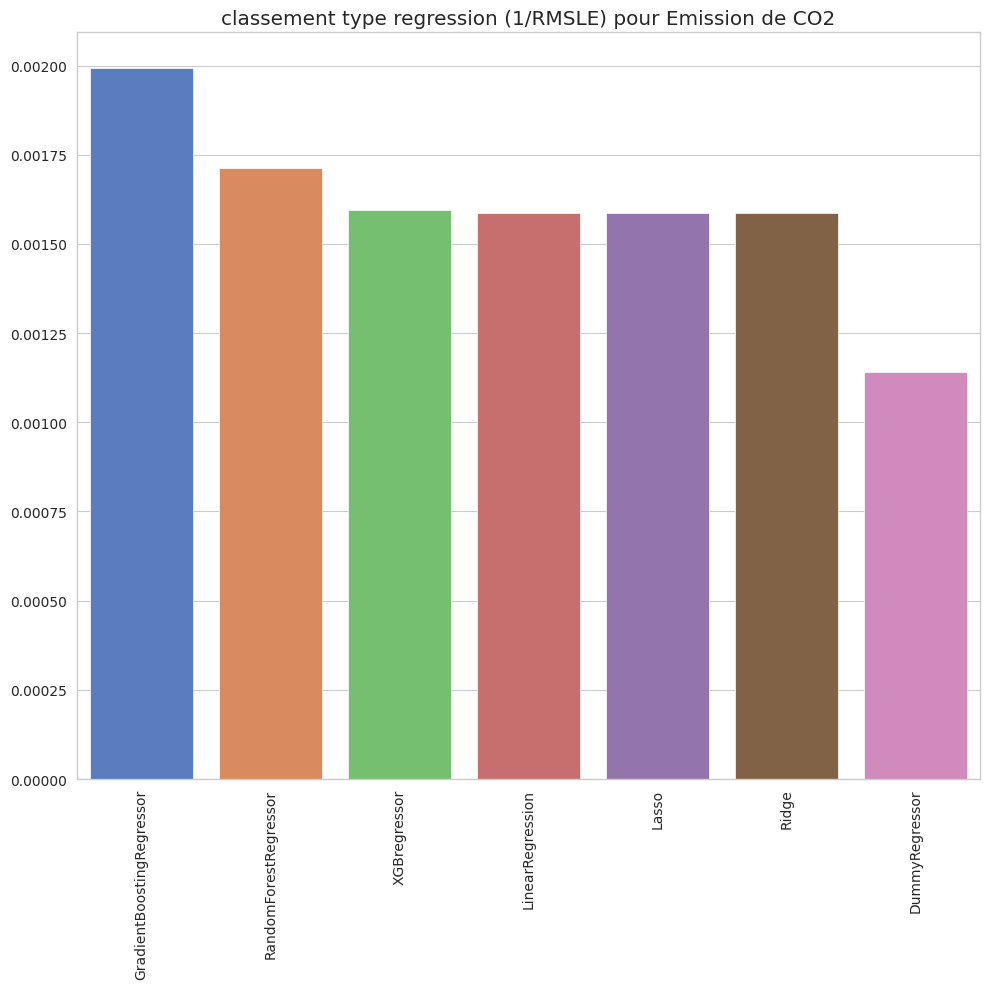

In [39]:
tabl_grap_x=[]
tabl_grap_y=[]
for li in list_sort:
    tabl_grap_x.append(li[0])
    tabl_grap_y.append(1/li[1][1])
    print(li[0],li[1][0],li[1][1])
plt.rcParams["figure.figsize"]=[10,10]
plt.title("classement type regression (1/RMSLE) pour Emission de CO2")
#plt.bar(tabl_grap_x,tabl_grap_y)
plt.xticks(rotation=90)
sns.barplot(x = tabl_grap_x,y = tabl_grap_y, palette="muted")
plt.tight_layout()
plt.savefig('P4_01_12_resultat_model.jpg')
plt.show()

In [42]:
gbr=GradientBoostingRegressor(n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 3, loss = 'quantile',  learning_rate = 0.01, criterion = 'friedman_mse')

In [43]:
gbr.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.01, loss='quantile',
                          max_features='auto', n_estimators=2000)

In [44]:
gbr.feature_importances_

array([0.04590039, 0.04622831, 0.09269654, 0.28772096, 0.05845765,
       0.04296414, 0.11026052, 0.02567203, 0.03286653, 0.25723293])

Text(0.5, 40.583333333333286, 'Relative Importance')

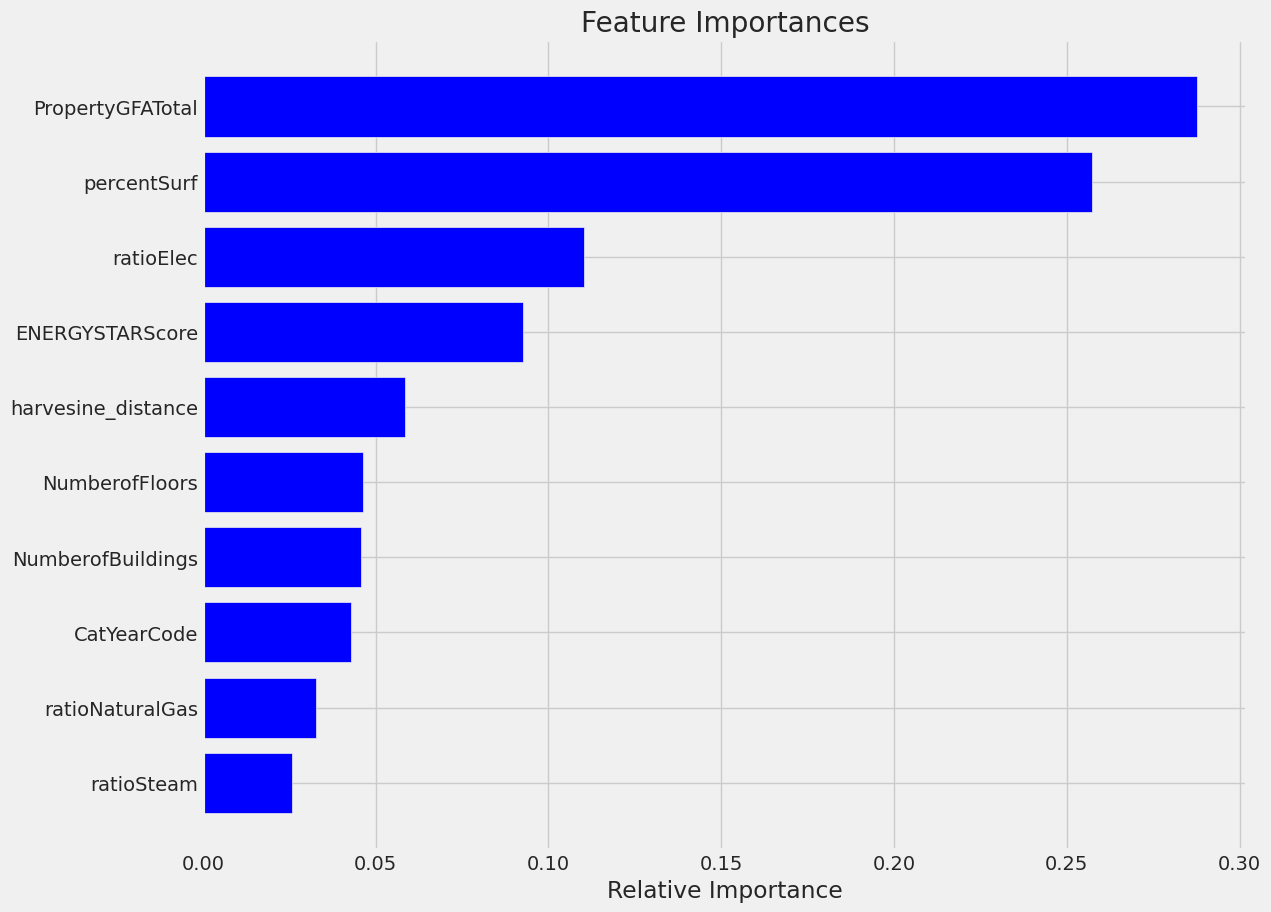

In [46]:
liste_variables=X_train.columns
importances =gbr.feature_importances_
indices = np.argsort(importances)

# style du graphique 
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.savefig('P4_01_13_feature_importance.jpg')
plt.xlabel('Relative Importance')

In [63]:
y_predict = gbr.predict(X_test)
y_predict

array([1.25114812e+02, 7.76463002e+01, 2.18402704e+02, 2.75559515e+02,
       1.34453857e+02, 3.18774822e+01, 1.77292157e+02, 6.33458885e+01,
       3.48017209e+02, 7.51225662e+00, 5.69399723e+01, 1.36277995e+02,
       1.58931483e+01, 1.76999411e+02, 6.60911086e+01, 2.69140301e+02,
       1.02086151e+03, 1.45748052e+02, 8.82080896e+01, 1.65849124e+02,
       2.84638819e+01, 1.11736341e+02, 2.91322621e+01, 7.16515828e+00,
       1.15650291e+01, 5.27226409e+02, 6.44943752e+02, 7.76673671e+01,
       1.19740117e+01, 1.75374966e+02, 8.16899052e+01, 1.85283202e+02,
       3.02077458e+01, 9.22879156e+00, 1.77292157e+02, 9.55975241e+01,
       3.64518900e+02, 1.74240935e+02, 1.29156595e+02, 6.94935871e+01,
       1.82411079e+02, 3.93574352e+02, 1.27380444e+02, 3.18774822e+01,
       1.05627460e+02, 8.51842366e+01, 3.69403268e+02, 5.88441640e+01,
       5.35385225e+02, 1.15650291e+01, 1.71841688e+02, 1.82243891e+02,
       1.21329478e+02, 7.71525666e+02, 3.66297421e+02, 1.93631193e+02,
      

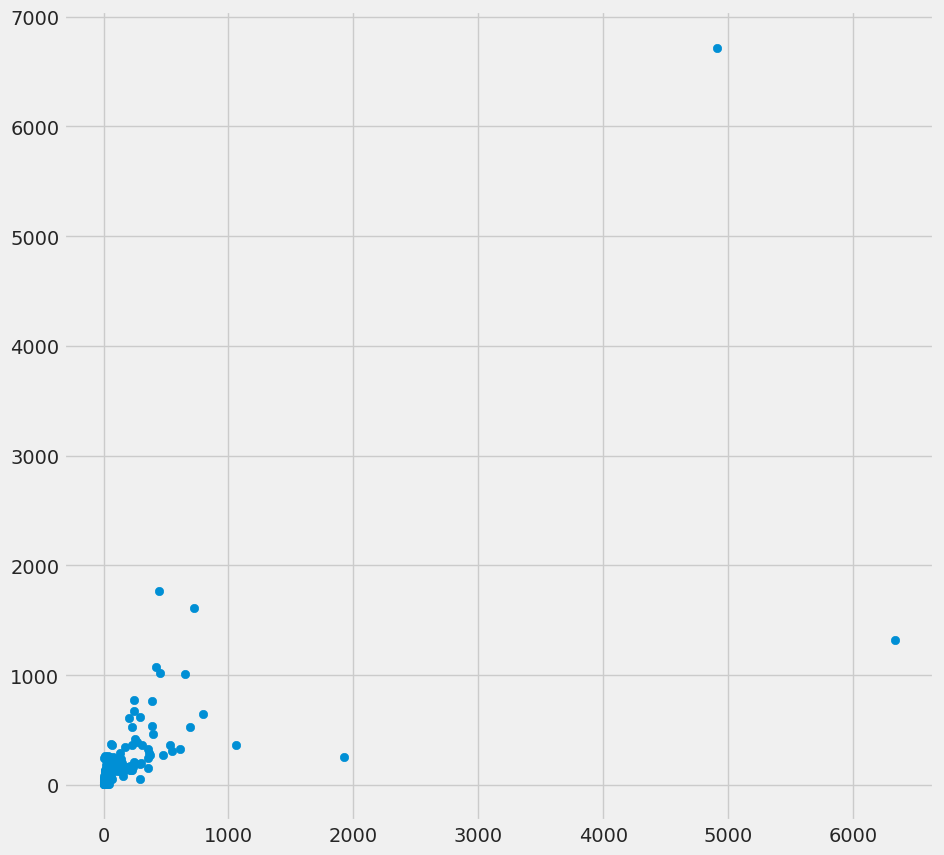

In [64]:
plt.scatter(Y_test, y_predict)

In [47]:
import shap  

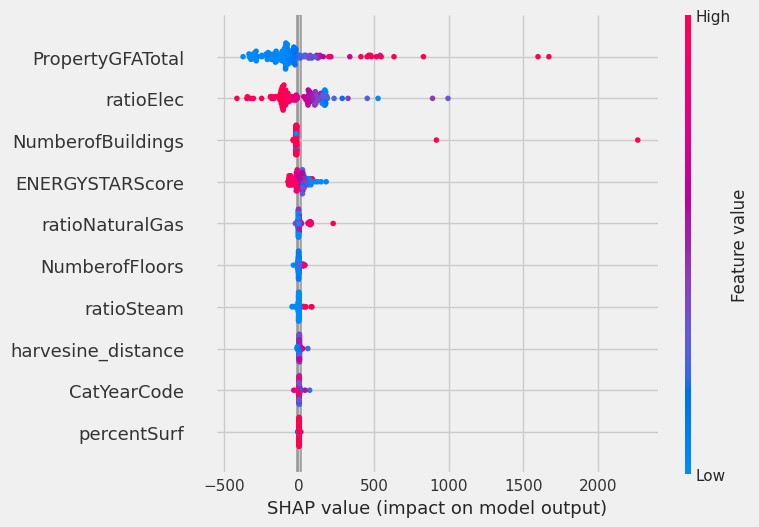

In [48]:
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Impact Energy Score

In [49]:
data_X.drop('ENERGYSTARScore', axis=1, inplace=True)

In [50]:
data_X.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'harvesine_distance', 'CatYearCode', 'ratioElec', 'ratioSteam',
       'ratioNaturalGas', 'percentSurf'],
      dtype='object')

In [51]:
Y = data['TotalGHGEmissions']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, Y, test_size=0.2, random_state=42)

In [55]:
X_train.shape

(797, 9)

In [54]:
Y_train.shape


(797,)

In [56]:
gbr.fit(X_train, Y_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.01, loss='quantile',
                          max_features='auto', n_estimators=2000)

In [57]:
y2_predict = gbr.predict(X_test)
y2_predict

array([1.25114812e+02, 7.76463002e+01, 2.18402704e+02, 2.75559515e+02,
       1.34453857e+02, 3.18774822e+01, 1.77292157e+02, 6.33458885e+01,
       3.48017209e+02, 7.51225662e+00, 5.69399723e+01, 1.36277995e+02,
       1.58931483e+01, 1.76999411e+02, 6.60911086e+01, 2.69140301e+02,
       1.02086151e+03, 1.45748052e+02, 8.82080896e+01, 1.65849124e+02,
       2.84638819e+01, 1.11736341e+02, 2.91322621e+01, 7.16515828e+00,
       1.15650291e+01, 5.27226409e+02, 6.44943752e+02, 7.76673671e+01,
       1.19740117e+01, 1.75374966e+02, 8.16899052e+01, 1.85283202e+02,
       3.02077458e+01, 9.22879156e+00, 1.77292157e+02, 9.55975241e+01,
       3.64518900e+02, 1.74240935e+02, 1.29156595e+02, 6.94935871e+01,
       1.82411079e+02, 3.93574352e+02, 1.27380444e+02, 3.18774822e+01,
       1.05627460e+02, 8.51842366e+01, 3.69403268e+02, 5.88441640e+01,
       5.35385225e+02, 1.15650291e+01, 1.71841688e+02, 1.82243891e+02,
       1.21329478e+02, 7.71525666e+02, 3.66297421e+02, 1.93631193e+02,
      

In [58]:
y2_predict.shape

(200,)

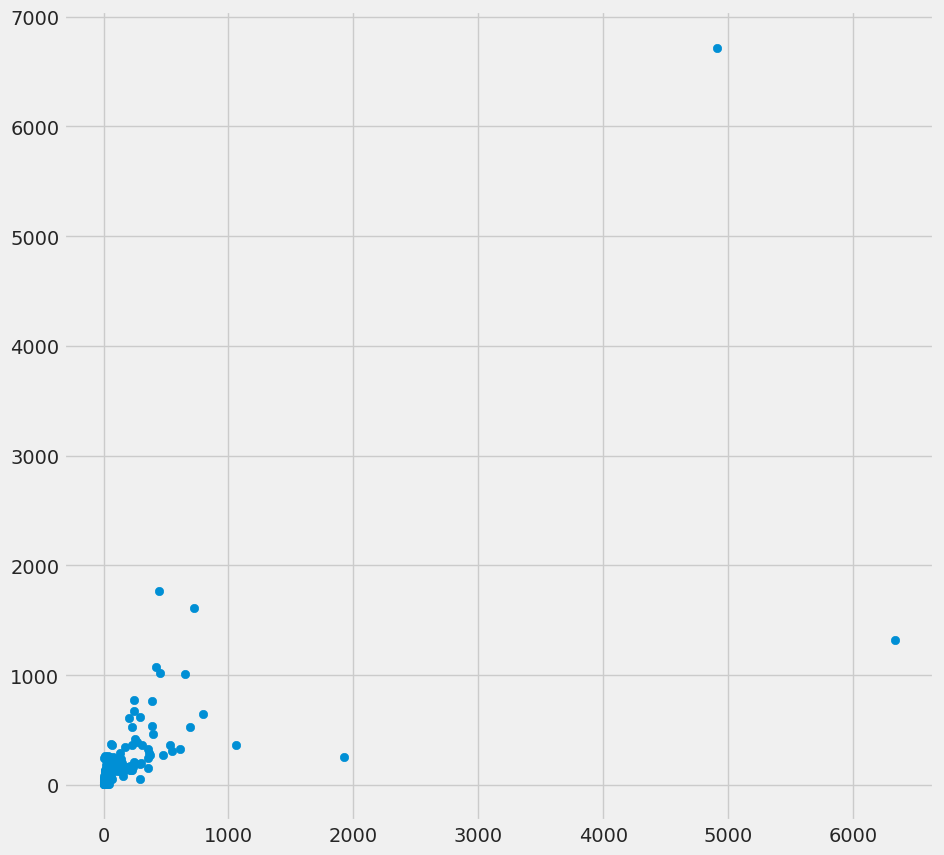

In [59]:
plt.scatter(Y_test, y2_predict)

Text(0.5, 40.583333333333286, 'Relative Importance')

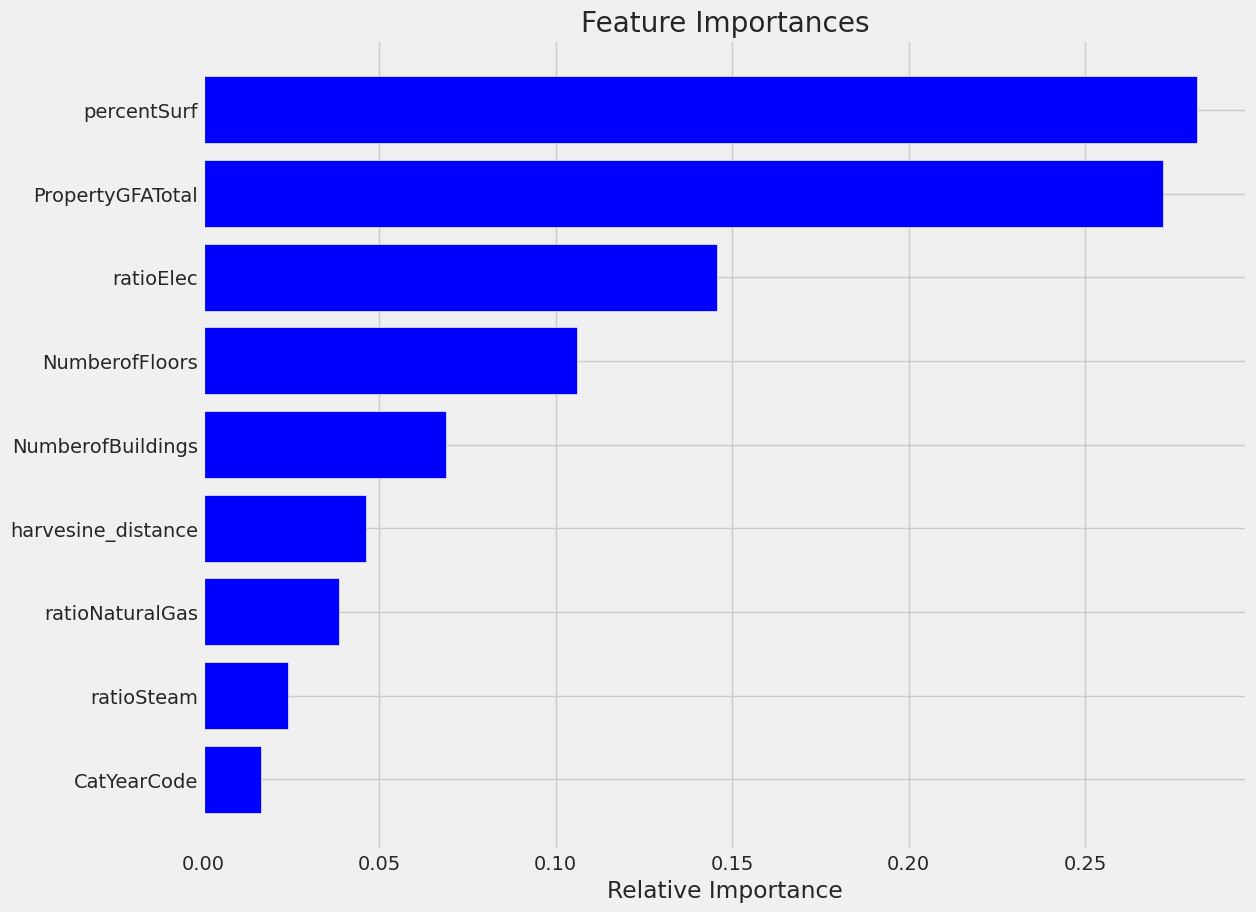

In [61]:
liste_variables=X_train.columns
importances =gbr.feature_importances_
indices = np.argsort(importances)

# style du graphique 
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.savefig('P4_01_13_feature_importance.jpg')
plt.xlabel('Relative Importance')

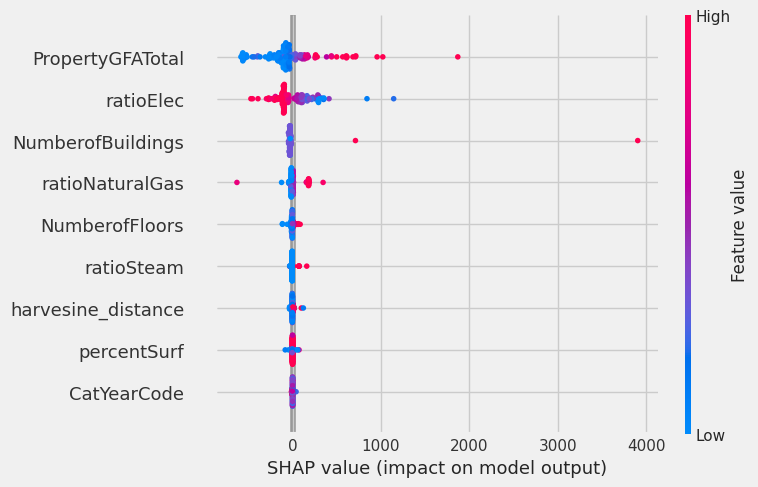

In [65]:
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 4/final_target_2.csv', index=False)